In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../datasets/RIASEC_Dataset_clustered.csv')
X = df.drop(columns=['major_cluster'])
y = df['major_cluster']

In [4]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(random_state=42, max_iter=5000)) 
])



=== Fold 1 ===
Macro F1-score: 0.2784
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.44      0.40      6794
           1       0.27      0.11      0.15      6794
           2       0.29      0.23      0.25      6794
           3       0.18      0.01      0.01      6794
           4       0.27      0.07      0.11      6794
           5       0.29      0.26      0.27      6793
           6       0.27      0.15      0.20      6793
           8       0.30      0.39      0.34      6794
          10       0.18      0.13      0.15      6794
          11       0.39      0.71      0.50      6794
          12       0.33      0.70      0.45      6794
          13       0.31      0.20      0.24      6794
          14       0.24      0.03      0.05      6794
          15       0.30      0.20      0.24      6794
          16       0.33      0.49      0.39      6793
          17       0.31      0.41      0.35      6794
          18       

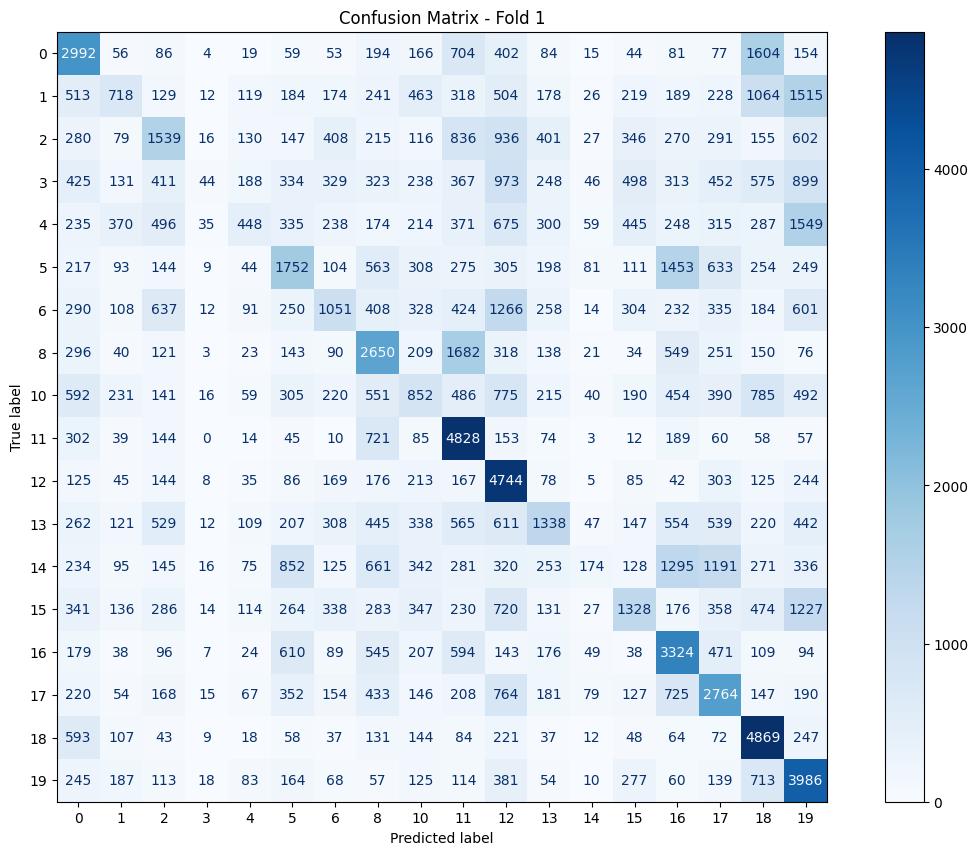


=== Fold 2 ===
Macro F1-score: 0.2764
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40      6794
           1       0.27      0.10      0.15      6794
           2       0.28      0.23      0.25      6794
           3       0.18      0.01      0.01      6793
           4       0.25      0.06      0.10      6794
           5       0.30      0.27      0.28      6794
           6       0.27      0.15      0.19      6794
           8       0.29      0.38      0.33      6794
          10       0.17      0.12      0.14      6794
          11       0.38      0.72      0.50      6794
          12       0.33      0.69      0.45      6794
          13       0.32      0.20      0.25      6794
          14       0.22      0.02      0.04      6793
          15       0.29      0.19      0.23      6794
          16       0.32      0.47      0.38      6794
          17       0.32      0.41      0.36      6794
          18       

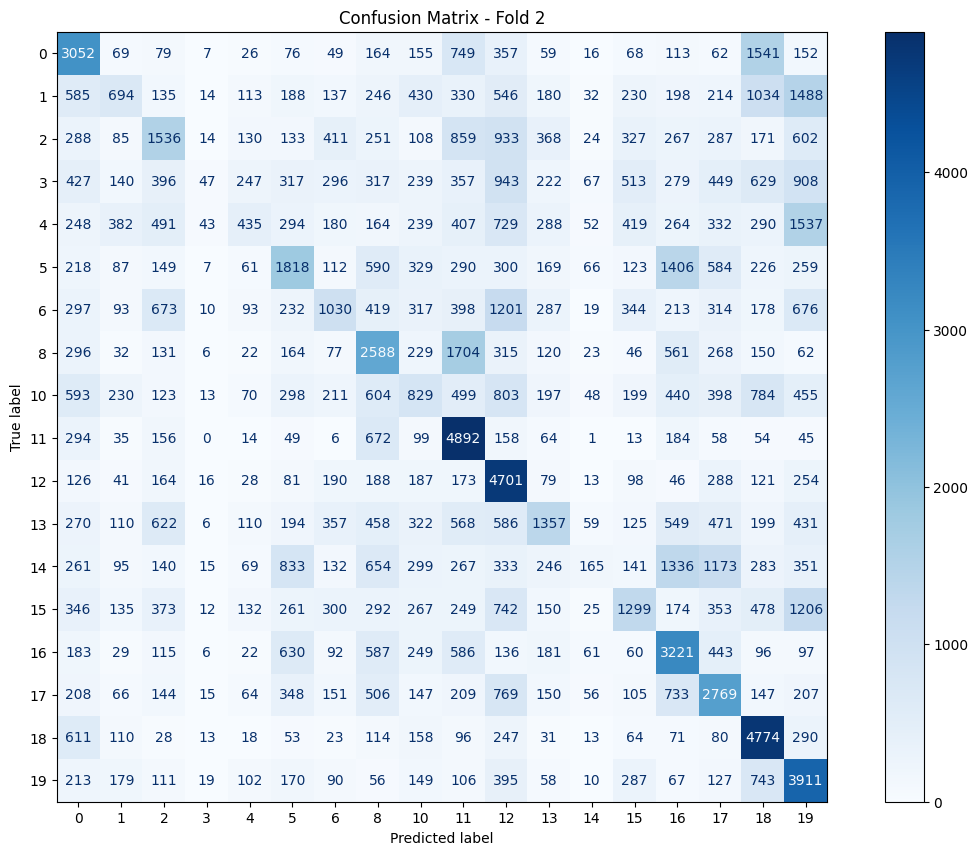


=== Fold 3 ===
Macro F1-score: 0.2769
Classification report:
              precision    recall  f1-score   support

           0       0.35      0.44      0.39      6794
           1       0.27      0.11      0.15      6794
           2       0.29      0.24      0.26      6793
           3       0.22      0.01      0.02      6794
           4       0.28      0.07      0.11      6793
           5       0.29      0.27      0.28      6794
           6       0.26      0.15      0.19      6794
           8       0.30      0.39      0.34      6794
          10       0.17      0.11      0.13      6793
          11       0.38      0.71      0.50      6794
          12       0.33      0.69      0.45      6794
          13       0.29      0.19      0.23      6794
          14       0.26      0.03      0.05      6794
          15       0.30      0.19      0.23      6794
          16       0.32      0.48      0.38      6794
          17       0.31      0.40      0.35      6793
          18       

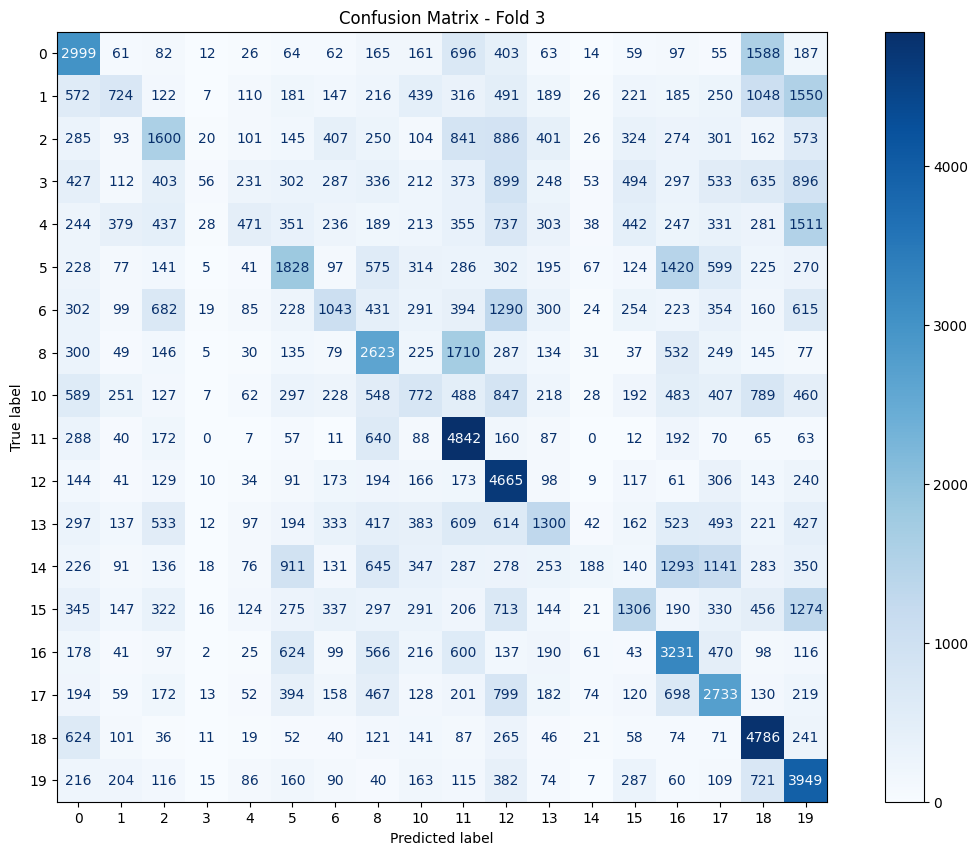


=== Fold 4 ===
Macro F1-score: 0.2771
Classification report:
              precision    recall  f1-score   support

           0       0.35      0.44      0.39      6794
           1       0.27      0.10      0.15      6794
           2       0.29      0.22      0.25      6794
           3       0.19      0.01      0.02      6794
           4       0.26      0.07      0.11      6794
           5       0.29      0.25      0.27      6794
           6       0.25      0.15      0.19      6794
           8       0.29      0.37      0.33      6793
          10       0.18      0.12      0.15      6794
          11       0.39      0.73      0.51      6793
          12       0.34      0.70      0.46      6793
          13       0.30      0.19      0.24      6794
          14       0.24      0.03      0.05      6794
          15       0.30      0.20      0.24      6793
          16       0.32      0.49      0.39      6794
          17       0.31      0.40      0.35      6794
          18       

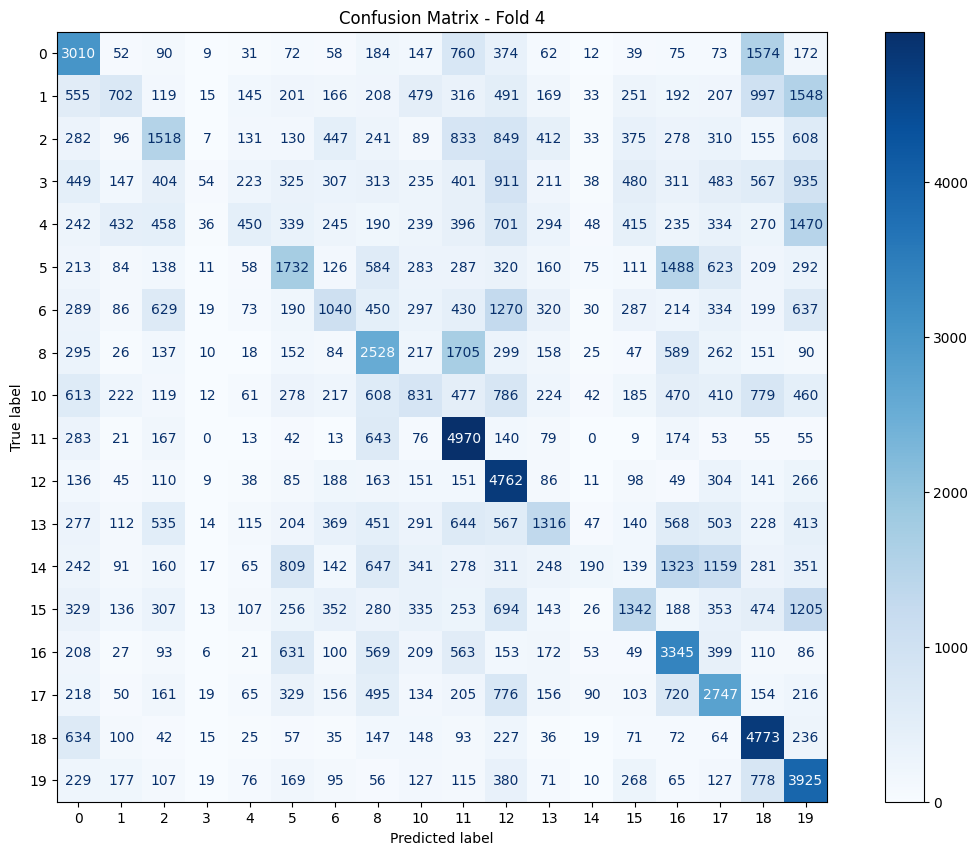


=== Fold 5 ===
Macro F1-score: 0.2778
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.44      0.39      6793
           1       0.28      0.11      0.16      6793
           2       0.29      0.23      0.26      6794
           3       0.16      0.01      0.01      6794
           4       0.26      0.07      0.10      6794
           5       0.28      0.26      0.27      6794
           6       0.26      0.15      0.19      6794
           8       0.29      0.38      0.33      6794
          10       0.18      0.12      0.14      6794
          11       0.39      0.73      0.51      6794
          12       0.33      0.69      0.45      6794
          13       0.30      0.19      0.23      6793
          14       0.25      0.03      0.05      6794
          15       0.30      0.20      0.24      6794
          16       0.33      0.49      0.39      6794
          17       0.31      0.41      0.35      6794
          18       

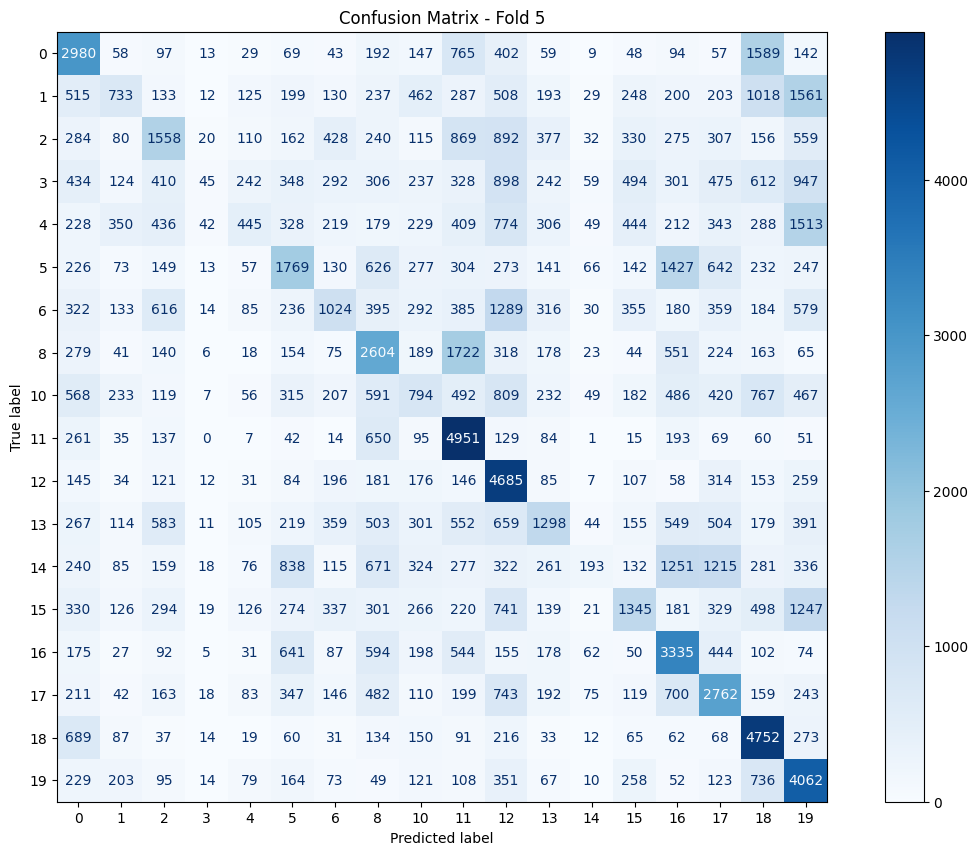


=== K-Fold Results ===
Mean Macro F1-score: 0.2773
Std Macro F1-score: 0.0007


In [6]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
fold = 1

for train_index, test_index in kf.split(X_res, y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)
    
    print(f"\n=== Fold {fold} ===")
    print(f"Macro F1-score: {f1:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    
    labels = sorted([c for c in set(y_test) | set(y_pred) if c not in [7, 9]])
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(15, 10)) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca()) 
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()
    
    fold += 1

print("\n=== K-Fold Results ===")
print(f"Mean Macro F1-score: {np.mean(f1_scores):.4f}")
print(f"Std Macro F1-score: {np.std(f1_scores):.4f}")